<a href="https://colab.research.google.com/github/NNaveenKV2348535/NNaveenKV2348535/blob/main/2348535_ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# **Importing the dataset**

In [2]:
# Load the TelCoX Customer Churn Dataset
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Datasets/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **1. Data Preprocessing**

Clean and preprocess the dataset, including handling missing values (if
any) and encoding categorical variables like &#39;sex&#39;, &#39;smoker&#39;, and &#39;region&#39;.

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
# Label Encoding for 'sex' and 'smoker'
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

# One-Hot Encoding for 'region'
df = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first=True)


In [7]:
# to check the Transformed Data
print(df.head())


   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 1   
4   32    1  28.880         0       0   3866.85520                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


# **2. Linear Regression Model**

Build a linear regression model to predict medical insurance costs
(charges) based on the available features (age, sex, BMI, children, smoker, region).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# Define the features (X) and target variable (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 33596915.85
R-squared (R2): 0.78


# **3. Model Evaluation**
- Split the dataset into training and testing sets.
- Train the linear regression model on the training set.
- Calculate and display the following evaluation metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2) score
- Adjusted R-squared score
- Residual Sum of Squares (RSS)
- Explained Variance Score

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared score
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
rss = np.sum((y_test - y_pred) ** 2)  # Residual Sum of Squares
explained_variance = 1 - (rss / (n * np.var(y_test)))
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Adjusted R-squared Score: {adj_r2:.2f}")
print(f"Residual Sum of Squares (RSS): {rss:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")


Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2) Score: 0.78
Adjusted R-squared Score: 0.78
Residual Sum of Squares (RSS): 9003973448.16
Explained Variance Score: 0.78


# **4. Feature Importance**

Determine which features have the most significant impact on predicting
medical insurance costs using the trained linear regression model.

In [13]:
# Get the coefficients (weights) of the linear regression model
coefficients = model.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the features by their absolute coefficients in descending order
feature_importance_df['Absolute_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the feature importance
print(feature_importance_df)


            Feature   Coefficient  Absolute_Coefficient
4            smoker  23651.128856          23651.128856
7  region_southwest   -809.799354            809.799354
6  region_southeast   -657.864297            657.864297
3          children    425.278784            425.278784
5  region_northwest   -370.677326            370.677326
2               bmi    337.092552            337.092552
0               age    256.975706            256.975706
1               sex    -18.591692             18.591692


# **5. Visualization**

Create a scatterplot that shows the actual insurance charges vs. predicted
insurance charges to visualize the model&#39;s performance.

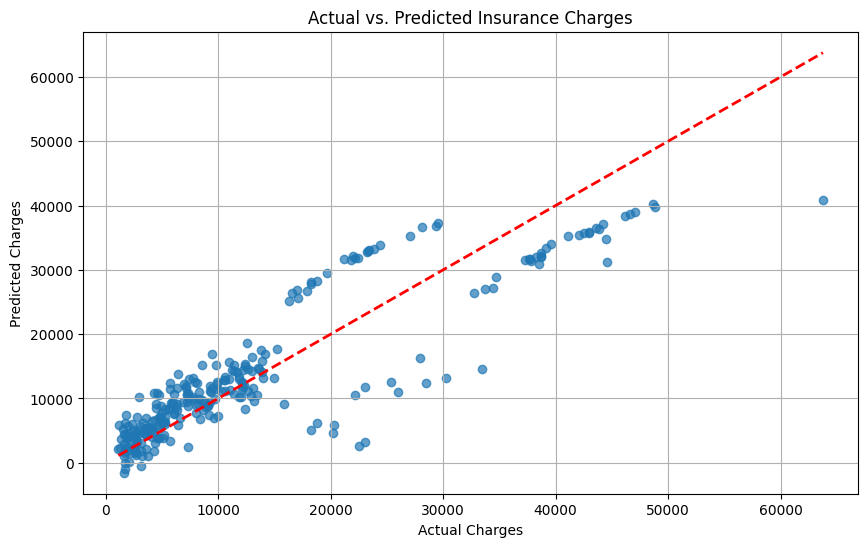

In [14]:
import matplotlib.pyplot as plt

# Create a scatterplot of actual vs. predicted insurance charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Show the plot
plt.show()


# **6. Recommendation**

Provide insights and recommendations based on your model's performance.
For example, what factors contribute most to higher medical insurance costs? How can individuals reduce their insurance costs?

**Factors Contributing to Higher Medical Insurance Costs:**

- **Smoking Status:** Medical insurance premiums are significantly influenced by a person's smoking history. Compared to non-smokers, smokers frequently face much higher insurance costs. Significant financial savings can be achieved by giving up smoking.

- **Age:** Another significant factor is age. In general, insurance costs rise with age. This is due to the fact that older people frequently require more healthcare and are more vulnerable to age-related illnesses.

- **BMI (Body Mass Index):** Another significant factor is age. In general, insurance costs rise with age. This is due to the fact that older people frequently require more healthcare and are more vulnerable to age-related illnesses.

**Factors That Can Impact Costs:**

- **Number of Children:** More children may raise insurance costs, although smoking, age, or BMI are better predictors of insurance costs. Planning for family size is crucial when taking healthcare and insurance costs into account.

- **Region:** Costs of insurance may also vary depending on where a person lives. It's possible that some areas have more expensive healthcare or different insurance market characteristics. It might be useful to compare insurance policies and suppliers across different locations.

**Recommendations for Reducing Insurance Costs:**

- **Quit Smoking:** Quitting smoking can result in significant long-term savings on healthcare costs as well as insurance premiums. For non-smokers, several insurance companies provide lower premiums.

- **Maintain a Healthy Lifestyle:** Maintain a healthy weight by engaging in regular exercise and eating a balanced diet. In addition to lowering insurance costs, this can also minimize the chance of developing chronic medical disorders.


- **Shop for Insurance:** Think about comparing insurance policies. distinct insurance companies offer a range of products with distinct price systems. To choose a plan that meets both your needs and your budget, compare them.


- **Consider High Deductible Plans:** You might choose a high deductible health insurance plan if you are normally in good health and have some savings. These plans frequently have greater deductibles but cheaper monthly premiums. If you don't need frequent medical attention, they might be affordable.

- **Utilize Preventive Services:** Utilize preventative healthcare options including yearly exams and screenings. Early health problem detection can result in more affordable treatments.


- **Explore Health Savings Accounts (HSAs):** If possible, think about starting an HSA. The money in an HSA can be used for certain medical expenses, like as deductibles and copayments, and contributions are tax deductible.
